In [80]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

import time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression



from catboost import CatBoostRegressor
import shap


In [63]:
df1 = pd.read_csv('qss45_data/insta_master.csv')

/var/folders/62/q5cwr8p541q40q2zbtg90hxh0000gn/T/ipykernel_24820/1582042069.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('qss45_data/insta_master.csv')


In [4]:
df1.columns

Index(['platformId', 'platform', 'date', 'updated', 'type', 'description',
       'postUrl', 'subscriberCount', 'score', 'media',
       'likeAndViewCountsDisabled', 'languageCode', 'legacyId', 'id',
       'statistics.actual.favoriteCount', 'statistics.actual.commentCount',
       'statistics.expected.favoriteCount', 'statistics.expected.commentCount',
       'account.id', 'account.name', 'account.handle', 'account.profileImage',
       'account.subscriberCount', 'account.url', 'account.platform',
       'account.platformId', 'account.verified', 'imageText', 'expandedLinks',
       'brandedContentSponsor.id', 'brandedContentSponsor.name',
       'brandedContentSponsor.handle', 'brandedContentSponsor.profileImage',
       'brandedContentSponsor.subscriberCount', 'brandedContentSponsor.url',
       'brandedContentSponsor.platform', 'brandedContentSponsor.platformId',
       'brandedContentSponsor.verified', 'account.pageDescription'],
      dtype='object')

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df1['subscriberCount'], bins = 50, kde=True, color='skyblue')  # Use sns.histplot
plt.title('Histogram of Subscriber Count')

plt.show()

In [64]:
df1['branded_content_flag'] = df1['brandedContentSponsor.id'].apply(lambda x: 0 if pd.isna(x) else 1)


In [65]:
df1['brandedContentSponsor.handle'].value_counts()

brandedContentSponsor.handle
skylinebuilders.official     91
comsol_multiphysics_2023     16
berlin                       14
lovebookstours               12
impexhome                    12
                             ..
wayfair                       1
colorsoftherapyfundraiser     1
fashionnova                   1
tasti_australia               1
thebalancedcompanyinc         1
Name: count, Length: 175, dtype: int64

In [26]:
df1['branded_content_flag'].value_counts()

branded_content_flag
0    541393
1       417
Name: count, dtype: int64

In [54]:
label_encoder = LabelEncoder()


In [66]:
categorical_df = df1.select_dtypes(include=['object'])
numerical_df = df1.select_dtypes(include=['number'])

categorical_features = list(categorical_df.columns)

categorical_df.fillna("NA", inplace = True)


df = pd.concat([categorical_df, numerical_df], axis = 1)


In [59]:
categorical_features

['type',
 'description',
 'languageCode',
 'id',
 'imageText',
 'expandedLinks',
 'account.pageDescription']

In [67]:
df2 = df1[['type',
       'subscriberCount', 'score',
       'likeAndViewCountsDisabled', 'legacyId', 
       'statistics.actual.favoriteCount', 'statistics.actual.commentCount',
       'statistics.expected.favoriteCount', 'statistics.expected.commentCount',
       'account.subscriberCount', 'account.verified', 'branded_content_flag']]

In [68]:
df2['type'] = pd.factorize(df2['type'])[0]


/var/folders/62/q5cwr8p541q40q2zbtg90hxh0000gn/T/ipykernel_24820/910485198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type'] = pd.factorize(df2['type'])[0]


In [69]:
# Define features and target
X = df2.drop(columns=['branded_content_flag'])
y = df2['branded_content_flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LogisticRegression()

In [70]:
X_train.dtypes

type                                   int64
subscriberCount                        int64
score                                float64
likeAndViewCountsDisabled               bool
legacyId                               int64
statistics.actual.favoriteCount        int64
statistics.actual.commentCount         int64
statistics.expected.favoriteCount      int64
statistics.expected.commentCount       int64
account.subscriberCount                int64
account.verified                        bool
dtype: object

In [72]:
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108191     79]
 [    92      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108270
           1       0.00      0.00      0.00        92

    accuracy                           1.00    108362
   macro avg       0.50      0.50      0.50    108362
weighted avg       1.00      1.00      1.00    108362



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

In [75]:
feature_names = X.columns
feature_names

Index(['type', 'subscriberCount', 'score', 'likeAndViewCountsDisabled',
       'legacyId', 'statistics.actual.favoriteCount',
       'statistics.actual.commentCount', 'statistics.expected.favoriteCount',
       'statistics.expected.commentCount', 'account.subscriberCount',
       'account.verified'],
      dtype='object')

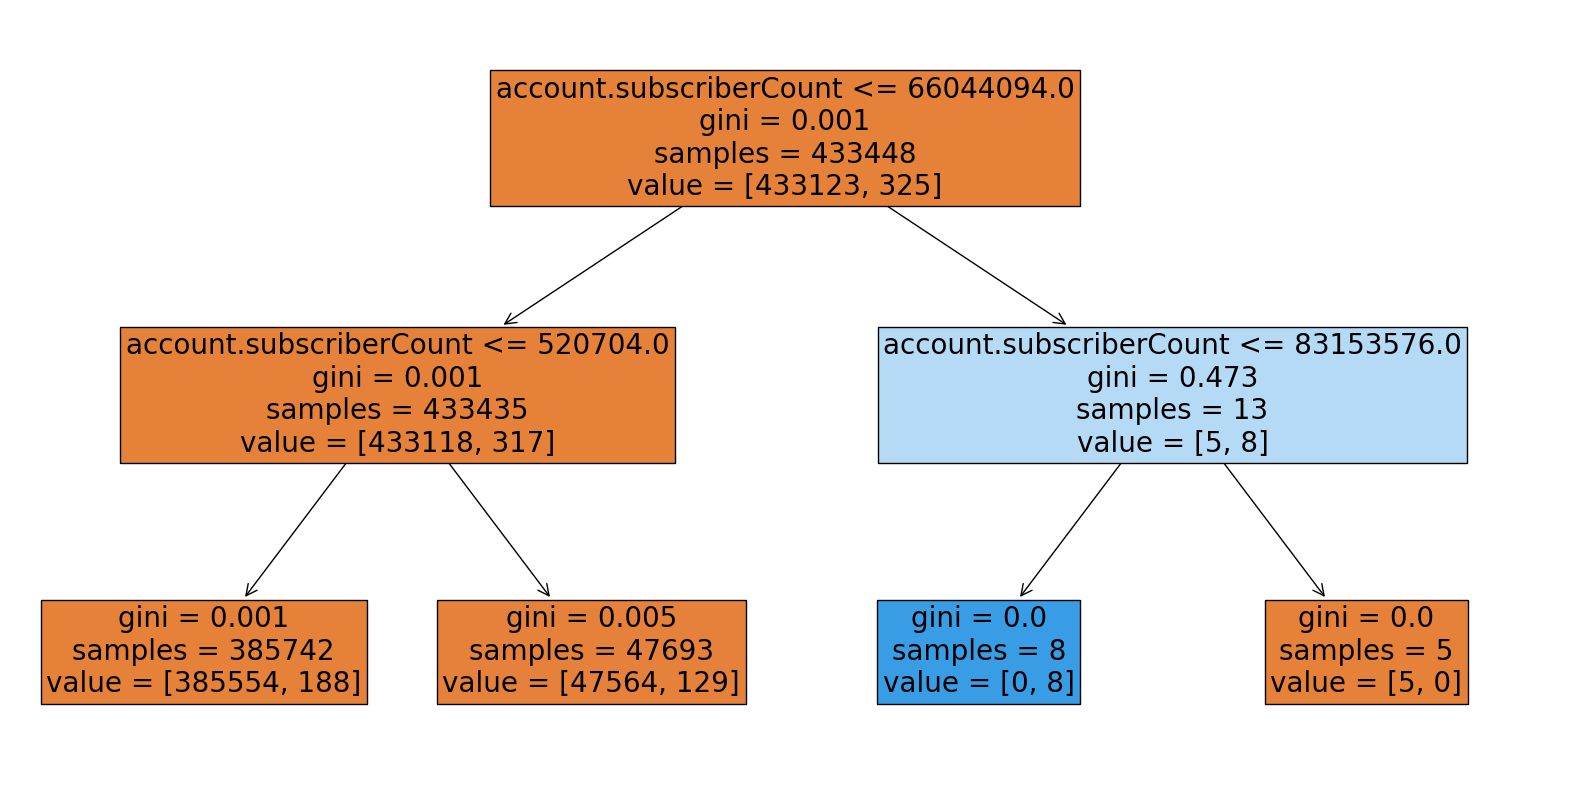

In [81]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
                   feature_names=feature_names,  
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

Decision Tree Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    108270
           1       1.00      0.01      0.02        92

    accuracy                           1.00    108362
   macro avg       1.00      0.51      0.51    108362
weighted avg       1.00      1.00      1.00    108362



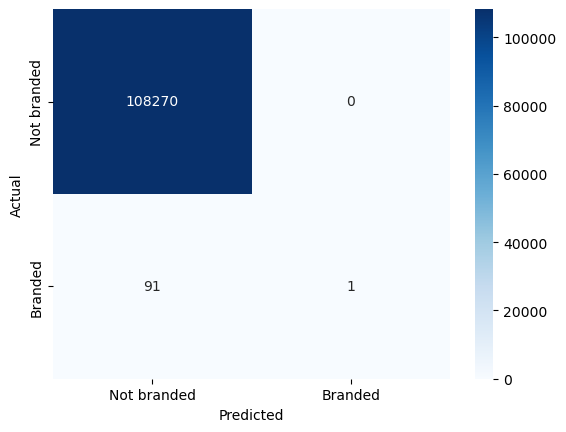

In [84]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot confusion matrix
confusion_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not branded', 'Branded'], 
            yticklabels=['Not branded', 'Branded'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [86]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    108270
           1       0.43      0.34      0.38        92

    accuracy                           1.00    108362
   macro avg       0.71      0.67      0.69    108362
weighted avg       1.00      1.00      1.00    108362

